<a href="https://colab.research.google.com/github/hiiragi-kaede/chainer_practice/blob/master/Chainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
def f(a):
  a=[6,7,8]
  print(id(a))

def g(a):
  a.append(1)

def func():
  a0=[1,2,3]
  print(id(a0))
  f(a0)
  
  print(a0)

  a1=[1,2,3]
  g(a1)
  print(a1)

func()

139656822769288
139656822786632
[1, 2, 3]
[1, 2, 3, 1]


In [0]:
class DataManager:
  def __init__(self,x,y,z):
    self.x=x
    self.y=y
    self.z=z
  
  def add_x(self,delta):
    self.x+=delta
  
  def add_y(self,delta):
    self.y+=delta
  
  def add_z(self,delta):
    self.z+=delta
  
  def sum(self):
    return self.x+self.y+self.z

data=DataManager(2,3,5)
print(data.sum())
data.add_x(4)
print(data.sum())
data.add_y(0)
print(data.sum())
data.add_z(-9)
print(data.sum())
print('{},{},{}'.format(data.x,data.y,data.z))

10
14
14
5
6,3,-4


In [0]:
num=[x for x in range(2,101)]
isprime=[True for x in range(2,101)]
for i in range(2,11):
  id=i
  while id<=100-i:
    id+=i
    isprime[id-2]=False
  
res=[x for x in num if isprime[x-2]]
print(res)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

dataset=load_boston()
x=dataset.data
t=dataset.target
pipeline=Pipeline([
  ('scaler',PowerTransformer()),
  ('reg',LinearRegression())
])
x_train,x_test,t_train,t_test=train_test_split(x,t,test_size=0.3,random_state=0)

pipeline.fit(x_train,t_train)
pipeline.score(x_train,t_train)
linear_result=pipeline.score(x_test,t_test)
print(linear_result)

0.7002856551689581


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [0]:
import numpy as np
import cupy as cp
import time
import tabulate

def get_w_np(x,t):
  xx=np.dot(x.T,x)
  xx_inv=np.linalg.inv(xx)
  xt=np.dot(x.T,t)
  w=np.dot(xx_inv,xt)
  return w

def get_w_cp(x,t):
  xx=cp.dot(x.T,x)
  xx_inv=cp.linalg.inv(xx)
  xt=cp.dot(x.T,t)
  w=cp.dot(xx_inv,xt)
  return w

times_cpu=[]
for N in [10,100,1000,10000]:
  np.random.seed(0)
  x=np.random.rand(N,N)
  t=np.random.rand(N,1)

  t_start=time.time()

  w=get_w_np(x,t)

  t_end=time.time()
  elapsed_time=t_end-t_start
  print('N={:>5}:{:>8.5f} sec'.format(N,elapsed_time))
  times_cpu.append(elapsed_time)

times_gpu=[]
for N in [10,100,1000,10000]:
  cp.random.seed(0)
  x=cp.random.rand(N,N)
  t=cp.random.rand(N,1)

  cp.cuda.Stream.null.synchronize()
  t_start=time.time()

  w=get_w_cp(x,t)

  cp.cuda.Stream.null.synchronize()
  t_end=time.time()
  elapsed_time=t_end-t_start
  print('N={:>5}:{:>8.5f} sec'.format(N,elapsed_time))
  times_gpu.append(elapsed_time)

N=[10,100,1000,10000]
times_cpu=np.asarray(times_cpu)
times_gpu=np.asarray(times_gpu)
ratio=['{:.2f} x'.format(r) for r in times_cpu/times_gpu]

table=tabulate.tabulate(
    zip(N,times_cpu,times_gpu,ratio),
    headers=['N','Numpyでの実行時間(sec)','Cupyでの実行時間(sec)','高速化倍率']
)
print(table)

N=   10: 0.00033 sec
N=  100: 0.00075 sec
N= 1000: 0.12585 sec
N=10000:90.99724 sec
N=   10: 0.00056 sec
N=  100: 0.00090 sec
N= 1000: 0.01531 sec
N=10000: 1.34605 sec
    N    Numpyでの実行時間(sec)    Cupyでの実行時間(sec)  高速化倍率
-----  ------------------------  -----------------------  ------------
   10               0.000325918              0.000562906  0.58 x
  100               0.000751019              0.000895023  0.84 x
 1000               0.125846                 0.0153127    8.22 x
10000              90.9972                   1.34605      67.60 x


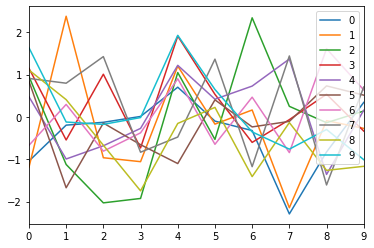

In [0]:
import pandas as pd
df=pd.read_csv('sample_data/california_housing_train.csv')
#df['target']=None
'''
mask1=df['median_house_value']<60000
mask2=(df['median_house_value'] >=60000) & (df['median_house_value'] < 70000)
mask3=(df['median_house_value'] >=70000) & (df['median_house_value'] < 80000)
mask4=df['median_house_value'] >= 80000

df.loc[mask1,'target']=0
df.loc[mask2,'target']=1
df.loc[mask3,'target']=2
df.loc[mask4,'target']=3
df.head()

df.iloc[0,0]=None
df.head()
mean=df.mean()
df_fillna=df.fillna(mean)
df_fillna.head()
'''
df=pd.DataFrame(
    data=np.random.randn(10,10)
)
df.plot()

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

df=pd.read_csv('sample_data/california_housing_train.csv')
df.head()
#plt.scatter(df['population'],df['median_house_value'])
#plt.hist(df['median_house_value'],bins=50)
#plt.boxplot((df['total_bedrooms'],df['population']))

#sns.distplot(df['population'])
#sns.pairplot(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [0]:
import numpy as np

x=np.array([2,3,1])
t=np.array([20])
#first layer
w1=np.array([[3,1,2],[-2,-3,-1]])
b1=np.array([0,0])
#second layer
w2=np.array([[3,2]])
b2=np.array([0])

u1=w1.dot(x)+b1
h1=1./(1+np.exp(-u1))
y=w2.dot(h1)+b2

dLdy=-2*(t-y)
dydw2=h1
dydh1=w2
dh1du1=h1*(1-h1)
du1dw1=x
dLdu1=dLdy*dydh1*dh1du1

du1dw1=du1dw1[None]

dLdw1=dLdu1.T.dot(du1dw1)
dLdw2=dLdy*dydw2

print('dLdw1:',dLdw1)
print('dLdw2:',dLdw2)

dLdw1: [[-3.40704286e-03 -5.11056429e-03 -1.70352143e-03]
 [-1.13088040e-04 -1.69632060e-04 -5.65440200e-05]]
dLdw2: [-3.39995290e+01 -2.82720335e-05]


In [0]:
import chainer
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import chainer.links as L
import chainer.functions as F
from chainer import Sequential
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#データを読み込み、chainerに合う型に変換
x,t=load_iris(return_X_y=True)
x=x.astype('float32')
t=t.astype('int32')

#テストデータとそれ以外で分割
x_train_val,x_test,t_train_val,t_test = train_test_split(x,t,test_size=0.3,random_state=0)
#上の残りを訓練用と検証用に分割
x_train,x_val,t_train,t_val=train_test_split(x_train_val,t_train_val,test_size=0.3,random_state=0)

l=L.Linear(3,2)
n_input=4
n_hidden=10
n_output=3

net=Sequential(
    L.Linear(n_input,n_hidden),F.relu,
    L.Linear(n_hidden,n_hidden),F.relu,
    L.Linear(n_hidden,n_output)
)

optimizer=chainer.optimizers.SGD(lr=0.01)
optimizer.setup(net)

n_epoch=30
n_batchsize=16

iteration=0

results_train={
    'loss':[],
    'accuracy':[]
}
results_valid={
    'loss':[],
    'accuracy':[]
}

for epoch in range(n_epoch):
  #データセットを並び替えた順番を取得
  order=np.random.permutation(range(len(x_train)))

  #各バッチごとの目的関数の出力と分類精度の保存用リスト
  loss_list=[]
  accuracy_list=[]

  for i in range(0,len(order),n_batchsize):
    #バッチを準備
    index=order[i:i+n_batchsize]
    x_train_batch=x_train[index,:]
    t_train_batch=t_train[index]

    #予測値をNNから出力
    y_train_batch=net(x_train_batch)

    #目的関数の出力から分類精度を計算する
    loss_train_batch=F.softmax_cross_entropy(y_train_batch,t_train_batch)
    accuracy_train_batch=F.accuracy(y_train_batch,t_train_batch)

    loss_list.append(loss_train_batch.array)
    accuracy_list.append(accuracy_train_batch.array)

    #勾配のリセットと勾配の計算
    net.cleargrads()
    loss_train_batch.backward()

    #パラメータの更新
    optimizer.update()

    #カウントアップ
    iteration+=1

  #訓練データに対する目的関数の出力と分類精度を集計
  loss_train=np.mean(loss_list)
  accuracy_train=np.mean(accuracy_list)

  #１エポック終えたら、検証データで評価
  #検証データで予測値を出力
  with chainer.using_config('train',False),chainer.using_config('enable_backprop',False):
    y_val=net(x_val)

  #目的関数の出力から分類精度を計算する
  loss_val=F.softmax_cross_entropy(y_val,t_val)
  accuracy_val=F.accuracy(y_val,t_val)

  #結果の表示
  #print('epoch: {},iteration: {}, loss(train): {:.4f}, loss(valid): {:.4f}'.format(
    #epoch,iteration,loss_train,loss_val.array))

  #ログを保存
  results_train['loss'].append(loss_train)
  results_train['accuracy'].append(accuracy_train)
  results_valid['loss'].append(loss_val.array)
  results_valid['accuracy'].append(accuracy_val.array)
'''
#目的関数の出力
plt.plot(results_train['loss'],label='train')
plt.plot(results_valid['loss'],label='valid')
plt.legend()
print("cost func")
plt.show()
#分類精度の出力
plt.plot(results_train['accuracy'],label='train')
plt.plot(results_valid['accuracy'],label='valid')
plt.legend()
print("\naccuracy")
plt.show()
'''

with chainer.using_config('train',False),chainer.using_config('enable_backprop',False):
  y_test=net(x_test)

accuracy_test=F.accuracy(y_test,t_test)
#print(accuracy_test.array)

chainer.serializers.save_npz("my_iris.net",net)

In [0]:
import chainer
from chainer import Sequential
import chainer.links as L
import chainer.functions as F
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

n_input=4
n_hidden=10
n_output=3

#データを読み込み、chainerに合う型に変換
x,t=load_iris(return_X_y=True)
x=x.astype('float32')
t=t.astype('int32')

#テストデータとそれ以外で分割
x_train_val,x_test,t_train_val,t_test = train_test_split(x,t,test_size=0.3,random_state=0)
#上の残りを訓練用と検証用に分割
x_train,x_val,t_train,t_val=train_test_split(x_train_val,t_train_val,test_size=0.3,random_state=0)

loaded_net=Sequential(
    L.Linear(n_input,n_hidden),F.relu,
    L.Linear(n_hidden,n_hidden),F.relu,
    L.Linear(n_hidden,n_output)
)
chainer.serializers.load_npz('my_iris.net',loaded_net)

with chainer.using_config('train',False),chainer.using_config('enabled_backprop',False):
  y_test=loaded_net(x_test)

print(np.argmax(y_test[0,:].array))

2


epoch: 0, iteration: 20, loss(train): 0.8206, loss(valid): 0.6395,acc(train): 0.5000, acc(valid): 0.6875
epoch: 1, iteration: 38, loss(train): 0.5983, loss(valid): 0.4052,acc(train): 0.5000, acc(valid): 0.9062
epoch: 2, iteration: 56, loss(train): 0.4452, loss(valid): 0.3281,acc(train): 1.0000, acc(valid): 0.9375
epoch: 3, iteration: 74, loss(train): 0.5320, loss(valid): 0.5086,acc(train): 0.5000, acc(valid): 0.7188
epoch: 4, iteration: 93, loss(train): 0.2967, loss(valid): 0.2734,acc(train): 1.0000, acc(valid): 0.9688
epoch: 5, iteration: 111, loss(train): 0.0362, loss(valid): 0.4637,acc(train): 1.0000, acc(valid): 0.7188
epoch: 6, iteration: 129, loss(train): 0.2118, loss(valid): 0.3252,acc(train): 1.0000, acc(valid): 0.8125
epoch: 7, iteration: 147, loss(train): 0.3074, loss(valid): 0.2229,acc(train): 1.0000, acc(valid): 0.9688
epoch: 8, iteration: 166, loss(train): 0.1084, loss(valid): 0.2231,acc(train): 1.0000, acc(valid): 0.9375
epoch: 9, iteration: 184, loss(train): 0.1681, loss

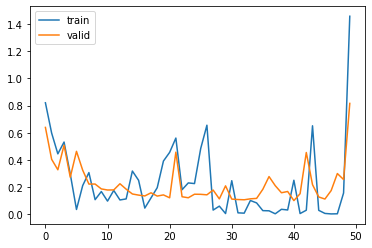

accuracy:


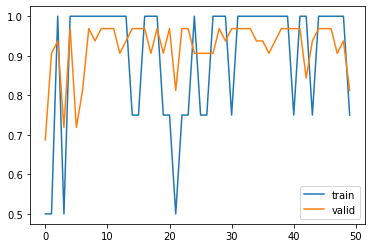

test loss: 0.6968
test accuracy: 0.8222
l2/b :	 (100,)
l2/W :	 (100, 100)
l3/b :	 (3,)
l3/W :	 (3, 100)
l1/b :	 (100,)
l1/W :	 (100, 4)


In [10]:
from sklearn.datasets import load_iris
from chainer.datasets import TupleDataset
from chainer.datasets import split_dataset_random
from chainer.iterators import SerialIterator
import chainer
import chainer.links as L
import chainer.functions as F
from chainer import optimizers
from chainer.optimizer_hooks import WeightDecay
import matplotlib.pyplot as plt
from chainer.serializers import save_npz

class Net(chainer.Chain):
  
  def __init__(self,n_in=4,n_hidden=3,n_out=3):
    super().__init__()
    with self.init_scope():
      self.l1=L.Linear(n_in,n_hidden)
      self.l2=L.Linear(n_hidden,n_hidden)
      self.l3=L.Linear(n_hidden,n_out)

  def forward(self,x):
    h=F.relu(self.l1(x))
    h=F.relu(self.l2(h))
    h=self.l3(h)

    return h

net=Net(n_hidden=100)

x,t=load_iris(return_X_y=True)
x=x.astype('float32')
t=t.astype('int32')

#入力値と目標値をタプルにして管理
dataset=TupleDataset(x,t)

#データを訓練用、検証用、テスト用に分割
train_val,test=split_dataset_random(dataset,int(len(dataset)*0.7),seed=0)
train,valid=split_dataset_random(train_val,int(len(train_val)*0.7),seed=0)

#ミニバッチイテレータを作成
train_iter=SerialIterator(train,batch_size=4,repeat=True,shuffle=True)

optimizer=optimizers.MomentumSGD(lr=0.001,momentum=0.9)
optimizer.setup(net)

#重み減衰をパラメータ更新の際にかける
for param in net.params():
  if param.name!='b':#バイアスは重み減衰させない
    param.update_rule.add_hook(WeightDecay(0.0001))#重み減衰をかける


gpu_id=0
n_batch=64
n_epoch=50

net.to_gpu(gpu_id)

#ログ出力用
results_train,results_valid={},{}
results_train['loss'],results_train['accuracy']=[],[]
results_valid['loss'],results_valid['accuracy']=[],[]

count=1

for epoch in range(n_epoch):
  while True:
    #ミニバッチの取得
    train_batch=train_iter.next()

    #x と tに分割
    #データをGPUに転送するために、concat_examplesにgpu_idを渡す
    x_train,t_train=chainer.dataset.concat_examples(train_batch,gpu_id)

    #予測値と目的関数の計算
    y_train=net(x_train)
    loss_train=F.softmax_cross_entropy(y_train,t_train)
    acc_train=F.accuracy(y_train,t_train)

    #勾配の初期化と勾配の計算
    net.cleargrads()
    loss_train.backward()

    #パラメータの更新
    optimizer.update()
    
    count+=1

    #1エポックごとにvalidデータで評価する
    if train_iter.is_new_epoch:
      #検証用データに対する結果の確認
      with chainer.using_config('train',False),chainer.using_config('enable_backprop',False):
        x_valid,t_valid=chainer.dataset.concat_examples(valid,gpu_id)
        y_valid=net(x_valid)
        loss_valid=F.softmax_cross_entropy(y_valid,t_valid)
        acc_valid=F.accuracy(y_valid,t_valid)

      #GPUで計算した結果をCPU上に転送する
      loss_train.to_cpu()
      loss_valid.to_cpu()
      acc_train.to_cpu()
      acc_valid.to_cpu()

      #結果の表示
      print("epoch: {}, iteration: {}, loss(train): {:.4f}, loss(valid): {:.4f},"
            "acc(train): {:.4f}, acc(valid): {:.4f}".format(
                epoch,count,loss_train.array.mean(),loss_valid.array.mean(),
                acc_train.array.mean(),acc_valid.array.mean()))

      #可視化用に保存
      results_train['loss'].append(loss_train.array)
      results_train['accuracy'].append(acc_train.array)
      results_valid['loss'].append(loss_valid.array)
      results_valid['accuracy'].append(acc_valid.array)

      break
  
  
print('\ncost function:')
plt.plot(results_train['loss'],label='train')
plt.plot(results_valid['loss'],label='valid')
plt.legend()
plt.show()

print('accuracy:')
plt.plot(results_train['accuracy'],label='train')
plt.plot(results_valid['accuracy'],label='valid')
plt.legend()
plt.show()

#テストデータに対する損失と制度を計算
x_test,t_test=chainer.dataset.concat_examples(test,device=gpu_id)
with chainer.using_config('train',False),chainer.using_config('enable_backprop',False):
  y_test=net(x_test)
  loss_test=F.softmax_cross_entropy(y_test,t_test)
  acc_test=F.accuracy(y_test,t_test)

print('test loss: {:.4f}'.format(loss_test.array.get()))
print('test accuracy: {:.4f}'.format(acc_test.array.get()))

In [11]:
import numpy as np

params=np.load('net.npz')

for key,param in params.items():
  print(key,':\t',param.shape)

l2/b :	 (100,)
l2/W :	 (100, 100)
l3/b :	 (3,)
l3/W :	 (3, 100)
l1/b :	 (100,)
l1/W :	 (100, 4)
